In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pd_pi
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing as pre
from sklearn.pipeline import Pipeline as pipe
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
import random
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt

In [32]:
#Finance Assignment 2 Data
data = pd.read_csv('finance.csv')

In [39]:
def setup(data, 
          target, 
          split=0.05):
    
  from sklearn.model_selection import train_test_split
  X = data.drop(target,axis=1)
  y = data[target]
  global X_train, X_test, y_train, y_test, seed
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-split)
  import random
  seed = random.randint(150,900)

In [40]:
setup(data, 'BK')

In [41]:
def create_model(estimator = None, 
                 ensemble = False, 
                 method = 'Bagging', 
                 fold = 10, 
                 round = 4,  
                 verbose = True):
  
  #defining X_train and y_train    
  data_X = X_train
  data_y = y_train
  
  #ignore co-linearity warnings for qda and lda 
  import warnings
  warnings.filterwarnings('ignore') 
  
  from sklearn.linear_model import LogisticRegression
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.naive_bayes import GaussianNB
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.svm import SVC
  from sklearn.svm import LinearSVC
  from sklearn.gaussian_process.kernels import RBF
  from sklearn.gaussian_process import GaussianProcessClassifier
  from sklearn.neural_network import MLPClassifier
  from sklearn.model_selection import StratifiedKFold  
  from sklearn.model_selection import StratifiedKFold
  from sklearn.linear_model import RidgeClassifier
  import numpy as np
  import pandas as pd
  import pandas_profiling as pd_p
  import seaborn as sns
  from sklearn import preprocessing as pre
  from sklearn.pipeline import Pipeline as pipe
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import Lasso
  from sklearn.linear_model import LogisticRegression
  from sklearn.linear_model import SGDClassifier
  from sklearn import metrics
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
  from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
  from sklearn.model_selection import GridSearchCV
  from sklearn.model_selection import RandomizedSearchCV
  from scipy import stats
  import random
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import cross_val_predict
  from sklearn.model_selection import cross_validate
  from sklearn.ensemble import AdaBoostClassifier
  from sklearn.ensemble import GradientBoostingClassifier
  from sklearn.ensemble import ExtraTreesClassifier
  from sklearn.model_selection import StratifiedKFold
  from sklearn.metrics import roc_auc_score
  from sklearn.metrics import cohen_kappa_score
  from sklearn.ensemble import BaggingClassifier
  from yellowbrick.classifier import roc_auc
  from yellowbrick.classifier import ROCAUC
  from yellowbrick.classifier import discrimination_threshold
  from yellowbrick.classifier import precision_recall_curve
  from yellowbrick.classifier import confusion_matrix
  from yellowbrick.classifier import class_prediction_error
  from yellowbrick.classifier import classification_report
    
  kf = StratifiedKFold(fold, random_state=seed)

  score_auc =np.empty((0,0))
  score_acc =np.empty((0,0))
  score_recall =np.empty((0,0))
  score_precision =np.empty((0,0))
  score_f1 =np.empty((0,0))
  score_kappa =np.empty((0,0))
  avgs_auc =np.empty((0,0))
  avgs_acc =np.empty((0,0))
  avgs_recall =np.empty((0,0))
  avgs_precision =np.empty((0,0))
  avgs_f1 =np.empty((0,0))
  avgs_kappa =np.empty((0,0))
    
  if estimator == None:
    print("Please enter your custom model as on object or choose from model library. If you have previously defined the estimator, the output is generated using the same estimator") 
  elif estimator == 'lr':
    model = LogisticRegression(random_state=seed)
    full_name = 'Logistic Regression'
  elif estimator == 'knn':
    model = KNeighborsClassifier()
    full_name = 'K Nearest Neighbours'
  elif estimator == 'nb':
    model = GaussianNB()
    full_name = 'Naive Bayes'
  elif estimator == 'dt':
    model = DecisionTreeClassifier(random_state=seed)
    full_name = 'Decision Tree'
  elif estimator == 'svm':
    model = SGDClassifier(max_iter=1000, tol=0.001, random_state=seed)
    full_name = 'Support Vector Machine'
  elif estimator == 'rbfsvm':
    model = SVC(gamma='auto', C=1, probability=True, kernel='rbf', random_state=seed)
    full_name = 'RBF SVM'
  elif estimator == 'gpc':
    model = GaussianProcessClassifier(random_state=seed)
    full_name = 'Gaussian Process Classifier'
  elif estimator == 'mlp':
    model = MLPClassifier(max_iter=500, random_state=seed)
    full_name = 'Multi Level Perceptron'    
  elif estimator == 'ridge':
    model = RidgeClassifier(random_state=seed)
    full_name = 'Ridge Classifier'        
  elif estimator == 'rf':
    model = RandomForestClassifier(n_estimators=10, random_state=seed)
    full_name = 'Random Forest Classifier'    
  elif estimator == 'qda':
    model = QuadraticDiscriminantAnalysis()
    full_name = 'Quadratic Discriminant Analysis'    
  elif estimator == 'ada':
    model = AdaBoostClassifier(random_state=seed)
    full_name = 'AdaBoost Classifier'        
  elif estimator == 'gbc':
    model = GradientBoostingClassifier(random_state=seed)
    full_name = 'Gradient Boosting Classifier'          
  elif estimator == 'lda':
    model = LinearDiscriminantAnalysis()
    full_name = 'Linear Discriminant Analysis'
  elif estimator == 'et':
    model = ExtraTreesClassifier(random_state=seed)
    full_name = 'Extra Trees Classifier'
  else:
    model = estimator
    full_name = str(model).split("(")[0]
  
  #checking ensemble method
    
  if ensemble and method == 'Bagging':
    model = BaggingClassifier(model,bootstrap=True,n_estimators=10, random_state=seed)
  elif ensemble and method == 'Boosting':
    model = AdaBoostClassifier(model, random_state=seed)
  elif method == 'Boosting':
    model = AdaBoostClassifier(model, random_state=seed)
     
  for train_i , test_i in kf.split(data_X,data_y):
    
    Xtrain,Xtest = data_X.iloc[train_i], data_X.iloc[test_i]
    ytrain,ytest = data_y.iloc[train_i], data_y.iloc[test_i]
    
    if hasattr(model, 'predict_proba'):
        
        model.fit(Xtrain,ytrain)
        pred_prob = model.predict_proba(Xtest)
        pred_prob = pred_prob[:,1]
        pred_ = model.predict(Xtest)
        sca = metrics.accuracy_score(ytest,pred_)
        sc = metrics.roc_auc_score(ytest,pred_prob)
        recall = metrics.recall_score(ytest,pred_)
        precision = metrics.precision_score(ytest,pred_)
        kappa = cohen_kappa_score(ytest,pred_)
        f1 = metrics.f1_score(ytest,pred_)
        score_acc = np.append(score_acc,sca)
        score_auc = np.append(score_auc,sc)
        score_recall = np.append(score_recall,recall)
        score_precision = np.append(score_precision,precision)
        score_f1 =np.append(score_f1,f1)
        score_kappa =np.append(score_kappa,kappa)
        
    else:
        
        model.fit(Xtrain,ytrain)
        pred_prob = 0.00
        pred_prob = 0.00
        pred_ = model.predict(Xtest)
        sca = metrics.accuracy_score(ytest,pred_)
        sc = 0.00
        recall = metrics.recall_score(ytest,pred_)
        precision = metrics.precision_score(ytest,pred_) #change pred_prob to pred_
        kappa = cohen_kappa_score(ytest,pred_)
        f1 = metrics.f1_score(ytest,pred_)
        score_acc = np.append(score_acc,sca)
        score_auc = np.append(score_auc,sc)
        score_recall = np.append(score_recall,recall)
        score_precision = np.append(score_precision,precision)
        score_f1 =np.append(score_f1,f1)
        score_kappa =np.append(score_kappa,kappa) 
       
  mean_acc=np.mean(score_acc)
  mean_auc=np.mean(score_auc)
  mean_recall=np.mean(score_recall)
  mean_precision=np.mean(score_precision)
  mean_f1=np.mean(score_f1)
  mean_kappa=np.mean(score_kappa)
  std_acc=np.std(score_acc)
  std_auc=np.std(score_auc)
  std_recall=np.std(score_recall)
  std_precision=np.std(score_precision)
  std_f1=np.std(score_f1)
  std_kappa=np.std(score_kappa)
    
  avgs_acc = np.append(avgs_acc, mean_acc)
  avgs_acc = np.append(avgs_acc, std_acc) 
  avgs_auc = np.append(avgs_auc, mean_auc)
  avgs_auc = np.append(avgs_auc, std_auc)
  avgs_recall = np.append(avgs_recall, mean_recall)
  avgs_recall = np.append(avgs_recall, std_recall)
  avgs_precision = np.append(avgs_precision, mean_precision)
  avgs_precision = np.append(avgs_precision, std_precision)
  avgs_f1 = np.append(avgs_f1, mean_f1)
  avgs_f1 = np.append(avgs_f1, std_f1)
  avgs_kappa = np.append(avgs_kappa, mean_kappa)
  avgs_kappa = np.append(avgs_kappa, std_kappa)
      
  model_results = pd.DataFrame({'Accuracy': score_acc, 'AUC': score_auc, 'Recall' : score_recall, 'Prec.' : score_precision , 
                     'F1' : score_f1, 'Kappa' : score_kappa})
  model_results_unpivot = pd.melt(model_results,value_vars=['Accuracy', 'AUC', 'Recall', 'Prec.', 'F1', 'Kappa'])
  model_results_unpivot.columns = ['Metric', 'Measure']
  model_avgs = pd.DataFrame({'Accuracy': avgs_acc, 'AUC': avgs_auc, 'Recall' : avgs_recall, 'Prec.' : avgs_precision , 
                     'F1' : avgs_f1, 'Kappa' : avgs_kappa},index=['Mean', 'SD'])
  
  model_results = model_results.append(model_avgs)
  model_results = model_results.round(round)  
 
  if verbose:
    from IPython.display import display, HTML
    display(HTML(model_results.to_html()))
    return model
  else:
    return model

In [42]:
def ensemble_model(estimator,
                   method = 'Bagging', 
                   fold = 10,
                   n_estimators = 10,
                   round = 4,  
                   verbose = True):
    
    #defining X_train and y_train    
    data_X = X_train
    data_y = y_train
  
    #ignore co-linearity warnings for qda and lda 
    import warnings
    warnings.filterwarnings('ignore') 
    
    #defining estimator as model
    model = estimator
     
    if method == 'Bagging':
        from sklearn.ensemble import BaggingClassifier
        model = BaggingClassifier(model,bootstrap=True,n_estimators=n_estimators, random_state=seed)
        
    else:
        from sklearn.ensemble import AdaBoostClassifier
        model = AdaBoostClassifier(model, random_state=seed)
    
    kf = StratifiedKFold(fold, random_state=seed)
    
    score_auc =np.empty((0,0))
    score_acc =np.empty((0,0))
    score_recall =np.empty((0,0))
    score_precision =np.empty((0,0))
    score_f1 =np.empty((0,0))
    score_kappa =np.empty((0,0))
    avgs_auc =np.empty((0,0))
    avgs_acc =np.empty((0,0))
    avgs_recall =np.empty((0,0))
    avgs_precision =np.empty((0,0))
    avgs_f1 =np.empty((0,0))
    avgs_kappa =np.empty((0,0))
    
    for train_i , test_i in kf.split(data_X,data_y):
        
        Xtrain,Xtest = data_X.iloc[train_i], data_X.iloc[test_i]
        ytrain,ytest = data_y.iloc[train_i], data_y.iloc[test_i]
    
        if hasattr(model, 'predict_proba'):
        
            model.fit(Xtrain,ytrain)
            pred_prob = model.predict_proba(Xtest)
            pred_prob = pred_prob[:,1]
            pred_ = model.predict(Xtest)
            sca = metrics.accuracy_score(ytest,pred_)
            sc = metrics.roc_auc_score(ytest,pred_prob)
            recall = metrics.recall_score(ytest,pred_)
            precision = metrics.precision_score(ytest,pred_)
            kappa = cohen_kappa_score(ytest,pred_)
            f1 = metrics.f1_score(ytest,pred_)
            score_acc = np.append(score_acc,sca)
            score_auc = np.append(score_auc,sc)
            score_recall = np.append(score_recall,recall)
            score_precision = np.append(score_precision,precision)
            score_f1 =np.append(score_f1,f1)
            score_kappa =np.append(score_kappa,kappa)
        
        else:
        
            model.fit(Xtrain,ytrain)
            pred_prob = 0.00
            pred_prob = 0.00
            pred_ = model.predict(Xtest)
            sca = metrics.accuracy_score(ytest,pred_)
            sc = 0.00
            recall = metrics.recall_score(ytest,pred_)
            precision = metrics.precision_score(ytest,pred_) #change pred_prob to pred_
            kappa = cohen_kappa_score(ytest,pred_)
            f1 = metrics.f1_score(ytest,pred_)
            score_acc = np.append(score_acc,sca)
            score_auc = np.append(score_auc,sc)
            score_recall = np.append(score_recall,recall)
            score_precision = np.append(score_precision,precision)
            score_f1 =np.append(score_f1,f1)
            score_kappa =np.append(score_kappa,kappa) 
       
    mean_acc=np.mean(score_acc)
    mean_auc=np.mean(score_auc)
    mean_recall=np.mean(score_recall)
    mean_precision=np.mean(score_precision)
    mean_f1=np.mean(score_f1)
    mean_kappa=np.mean(score_kappa)
    std_acc=np.std(score_acc)
    std_auc=np.std(score_auc)
    std_recall=np.std(score_recall)
    std_precision=np.std(score_precision)
    std_f1=np.std(score_f1)
    std_kappa=np.std(score_kappa)

    avgs_acc = np.append(avgs_acc, mean_acc)
    avgs_acc = np.append(avgs_acc, std_acc) 
    avgs_auc = np.append(avgs_auc, mean_auc)
    avgs_auc = np.append(avgs_auc, std_auc)
    avgs_recall = np.append(avgs_recall, mean_recall)
    avgs_recall = np.append(avgs_recall, std_recall)
    avgs_precision = np.append(avgs_precision, mean_precision)
    avgs_precision = np.append(avgs_precision, std_precision)
    avgs_f1 = np.append(avgs_f1, mean_f1)
    avgs_f1 = np.append(avgs_f1, std_f1)
    avgs_kappa = np.append(avgs_kappa, mean_kappa)
    avgs_kappa = np.append(avgs_kappa, std_kappa)

    model_results = pd.DataFrame({'Accuracy': score_acc, 'AUC': score_auc, 'Recall' : score_recall, 'Prec.' : score_precision , 
                     'F1' : score_f1, 'Kappa' : score_kappa})
    model_results_unpivot = pd.melt(model_results,value_vars=['Accuracy', 'AUC', 'Recall', 'Prec.', 'F1', 'Kappa'])
    model_results_unpivot.columns = ['Metric', 'Measure']
    model_avgs = pd.DataFrame({'Accuracy': avgs_acc, 'AUC': avgs_auc, 'Recall' : avgs_recall, 'Prec.' : avgs_precision , 
                     'F1' : avgs_f1, 'Kappa' : avgs_kappa},index=['Mean', 'SD'])

    model_results = model_results.append(model_avgs)
    model_results = model_results.round(round)  
    
    model = model
    
    if verbose:
        display(model_results)
        return model
    else:
        return model    

In [43]:
def plot_model(estimator, 
               plot = 'auc', 
               manifold='tsne',
               features=5):
    
    model = estimator
    
    if plot == 'auc':
        from yellowbrick.classifier import ROCAUC
        visualizer = ROCAUC(model)
        visualizer.fit(X_train, y_train)
        visualizer.score(X_test, y_test)
        visualizer.poof()
        
    elif plot == 'threshold':
        from yellowbrick.classifier import DiscriminationThreshold
        visualizer = DiscriminationThreshold(model, random_state=seed)
        visualizer.fit(X_train, y_train)
        visualizer.score(X_test, y_test)
        visualizer.poof()
    
    elif plot == 'pr':
        from yellowbrick.classifier import PrecisionRecallCurve
        visualizer = PrecisionRecallCurve(model, random_state=seed)
        visualizer.fit(X_train, y_train)
        visualizer.score(X_test, y_test)
        visualizer.poof()

    elif plot == 'confusion_matrix':
        from yellowbrick.classifier import ConfusionMatrix
        visualizer = ConfusionMatrix(model, random_state=seed, fontsize=15, cmap="Greens")
        visualizer.fit(X_train, y_train)
        visualizer.score(X_test, y_test)
        visualizer.poof()
    
    elif plot == 'error':
        from yellowbrick.classifier import ClassPredictionError
        visualizer = ClassPredictionError(model, random_state=seed)
        visualizer.fit(X_train, y_train)
        visualizer.score(X_test, y_test)
        visualizer.poof()

    elif plot == 'class_report':
        from yellowbrick.classifier import ClassificationReport
        visualizer = ClassificationReport(model, random_state=seed, support=True)
        visualizer.fit(X_train, y_train)
        visualizer.score(X_test, y_test)
        visualizer.poof()
        
    elif plot == 'boundary':
        
        from sklearn.preprocessing import StandardScaler
        from sklearn.decomposition import PCA
        from yellowbrick.contrib.classifier import DecisionViz        

        X_train_transformed = X_train.select_dtypes(include='float64')
        X_test_transformed = X_test.select_dtypes(include='float64')
        X_train_transformed = StandardScaler().fit_transform(X_train_transformed)
        X_test_transformed = StandardScaler().fit_transform(X_test_transformed)
        pca = PCA(n_components=2, random_state = seed)
        X_train_transformed = pca.fit_transform(X_train_transformed)
        X_test_transformed = pca.fit_transform(X_test_transformed)

        y_train_transformed = np.array(y_train)
        y_test_transformed = np.array(y_test)
        
        model_transformed = model
        
        viz = DecisionViz(model_transformed)
        viz.fit(X_train_transformed, y_train_transformed, features=['Feature One', 'Feature Two'], classes=['A', 'B'])
        viz.draw(X_test_transformed, y_test_transformed)
        viz.poof()
        
    elif plot == 'rfe':
        from yellowbrick.model_selection import RFECV    
        visualizer = RFECV(model, cv=10)
        visualizer.fit(X_train, y_train)
        visualizer.poof()
        
        
    elif plot == 'learning':
        from yellowbrick.model_selection import LearningCurve
        sizes = np.linspace(0.3, 1.0, 10)  
        visualizer = LearningCurve(model, cv=10, scoring='f1_weighted', train_sizes=sizes, n_jobs=1, random_state=seed)
        visualizer.fit(X_train, y_train)
        visualizer.poof()
        
    
    elif plot == 'manifold':
        from yellowbrick.features import Manifold
        X_train_transformed = X_train.select_dtypes(include='float64') 
        visualizer = Manifold(manifold=manifold, random_state = seed)
        visualizer.fit_transform(X_train_transformed, y_train)
        visualizer.poof()       
        
    elif plot == 'calibration':      
                
        from sklearn.calibration import calibration_curve
        
        model_name = str(model).split("(")[0]
        
        plt.figure(figsize=(7, 6))
        ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)

        ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
        #model.fit(X_train, y_train)
        prob_pos = model.predict_proba(X_test)[:, 1]
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)

        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",label="%s" % (model_name, ))

        ax1.set_ylabel("Fraction of positives")
        ax1.set_ylim([0, 1])
        ax1.set_xlim([0, 1])
        ax1.legend(loc="lower right")
        ax1.set_title('Calibration plots  (reliability curve)')
        ax1.set_facecolor('white')
        ax1.grid(b=True, color='grey', linewidth=0.5, linestyle = '-')
        plt.tight_layout()
        plt.show() 
        
    elif plot == 'vc':
    
        if hasattr(model, 'max_depth'):
            param_name='max_depth'
        else:
            param_name='xxx'
       
        from yellowbrick.model_selection import ValidationCurve
        viz = ValidationCurve(model, param_name=param_name, param_range=np.arange(1,11), scoring='f1_weighted',cv=10, 
                              random_state=seed)
        viz.fit(X_train, y_train)
        viz.poof()
        
    elif plot == 'dimension':
    
        from yellowbrick.features import RadViz
        from sklearn.preprocessing import StandardScaler
        from sklearn.decomposition import PCA

        X_train_transformed = X_train.select_dtypes(include='float64') 
        X_train_transformed = StandardScaler().fit_transform(X_train_transformed)
        y_train_transformed = np.array(y_train)

        pca = PCA(n_components=features, random_state=seed)
        X_train_transformed = pca.fit_transform(X_train_transformed)

        classes = ["1", "0"]
        visualizer = RadViz(classes=classes, alpha=0.25)
        visualizer.fit(X_train_transformed, y_train_transformed)     
        visualizer.transform(X_train_transformed)
        visualizer.poof()
        
    elif plot == 'feature':
        variables = abs(model.coef_[0])
        col_names = np.array(X_train.columns)
        coef_df = pd.DataFrame({'Variable': X_train.columns, 'Value': variables})
        sorted_df = coef_df.sort_values(by='Value')
        my_range=range(1,len(sorted_df.index)+1)
        plt.figure(figsize=(8,5))
        plt.hlines(y=my_range, xmin=0, xmax=sorted_df['Value'], color='skyblue')
        plt.plot(sorted_df['Value'], my_range, "o")
        plt.yticks(my_range, sorted_df['Variable'])
        plt.title("Feature Importance Plot")
        plt.xlabel('Variable Importance')
        plt.ylabel('Features') 
        var_imp = sorted_df.reset_index(drop=True)
        var_imp_array = np.array(var_imp['Variable'])
        var_imp_array_top_n = var_imp_array[0:len(var_imp_array)]

In [44]:
def compare_models(model_library = None, 
                   fold = 10, 
                   round = 4, 
                   sort = 'Accuracy', 
                   blacklist = None):
  
  #ignore warnings
  import warnings
  warnings.filterwarnings('ignore') 
    
  #defining X_train and y_train
  data_X = X_train
  data_y=y_train

  from sklearn.linear_model import LogisticRegression
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.naive_bayes import GaussianNB
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.svm import SVC
  from sklearn.gaussian_process.kernels import RBF
  from sklearn.gaussian_process import GaussianProcessClassifier
  from sklearn.neural_network import MLPClassifier
  from sklearn.model_selection import StratifiedKFold
  from sklearn import preprocessing as pre
  from sklearn.pipeline import Pipeline as pipe
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import RidgeClassifier
  from sklearn.linear_model import Lasso
  from sklearn.linear_model import LogisticRegression
  from sklearn.linear_model import SGDClassifier
  from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
  from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
  from sklearn import metrics
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.ensemble import ExtraTreesClassifier
  from sklearn.model_selection import GridSearchCV
  from sklearn.model_selection import RandomizedSearchCV
  from scipy import stats
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import cross_val_predict
  from sklearn.model_selection import cross_validate
  from sklearn.ensemble import AdaBoostClassifier
  from sklearn.ensemble import GradientBoostingClassifier
  from sklearn.ensemble import BaggingClassifier
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.model_selection import StratifiedKFold
  from sklearn.metrics import roc_auc_score
  from sklearn.metrics import cohen_kappa_score
  import numpy as np
  import pandas as pd
  import pandas_profiling as pd_p
  import seaborn as sns
  import random
  import pandas.io.formats.style

  lr = LogisticRegression(random_state=seed)
  knn = KNeighborsClassifier()
  nb = GaussianNB()
  dt = DecisionTreeClassifier(random_state=seed)
  svm = SGDClassifier(max_iter=1000, tol=0.001, random_state=seed)
  rbfsvm = SVC(gamma='auto', C=1, probability=True, kernel='rbf', random_state=seed)
  gpc = GaussianProcessClassifier(random_state=seed)
  mlp = MLPClassifier(max_iter=500, random_state=seed)
  ridge = RidgeClassifier(random_state=seed)
  rf = RandomForestClassifier(n_estimators=10, random_state=seed)
  qda = QuadraticDiscriminantAnalysis()
  ada = AdaBoostClassifier(random_state=seed)
  gbc = GradientBoostingClassifier(random_state=seed)
  lda = LinearDiscriminantAnalysis()
  et = ExtraTreesClassifier(random_state=seed)
  
  #blacklist models

  if model_library != None:
    
    model_library = model_library
    
    model_names = []
    
    for names in model_library:
        
        model_names = np.append(model_names, str(names).split("(")[0])
        
        import re 
        
        def putSpace(input):
            words = re.findall('[A-Z][a-z]*', input)
            words = ' '.join(words)
            return words  

        model_names_modified = []
        for i in model_names:
            model_names_modified.append(putSpace(i))
            
        model_names_modified = []
        for i in model_names:
            model_names_modified.append(putSpace(i))

        model_names = model_names_modified

        model_names_final = []
        for j in model_names:
            if j == 'Gaussian N B':
                model_names_final.append('Naive Bayes')
            elif j == 'M L P Classifier':
                model_names_final.append('MLP Classifier')
            elif j == 'S G D Classifier':
                model_names_final.append('SVM - Linear Kernel')
            elif j == 'S V C':
                model_names_final.append('SVM - Radial Kernel')
            else: 
                model_names_final.append(j)

        model_names = model_names_final    
    
  else:
        
    if blacklist == None:
        
        model_library = [lr, knn, nb, dt, svm, rbfsvm, gpc, mlp, ridge, rf, qda, ada, gbc, lda, et]
    
        model_names = []
    
        for names in model_library:
            model_names = np.append(model_names, str(names).split("(")[0])
    
        import re 

        def putSpace(input):
            words = re.findall('[A-Z][a-z]*', input)
            words = ' '.join(words)
            return words  

        model_names_modified = []
        for i in model_names:
            model_names_modified.append(putSpace(i))

        model_names = model_names_modified

        model_names_final = []
        for j in model_names:
            if j == 'Gaussian N B':
                model_names_final.append('Naive Bayes')
            elif j == 'M L P Classifier':
                model_names_final.append('MLP Classifier')
            elif j == 'S G D Classifier':
                model_names_final.append('SVM - Linear Kernel')
            elif j == 'S V C':
                model_names_final.append('SVM - Radial Kernel')
            else: 
                model_names_final.append(j)

        model_names = model_names_final

    else:
        
        model_library_values = ['lr', 'knn', 'nb', 'dt', 'svm', 'rbfsvm', 'gpc', 'mlp', 'ridge', 'rf', 'qda', 
                        'ada', 'gbc', 'lda', 'et']

        location = []

        for item in blacklist:
            location.append(model_library_values.index(item))

        model_library = [lr, knn, nb, dt, svm, rbfsvm, gpc, mlp, ridge, rf, qda, ada, gbc, lda, et]

        for i in location:
            del model_library[i]

        model_names = []

        for names in model_library:
            model_names = np.append(model_names, str(names).split("(")[0])

        import re

        def putSpace(input):
            words = re.findall('[A-Z][a-z]*', input)
            words = ' '.join(words)
            return words  

        model_names_modified = []
        for i in model_names:
            model_names_modified.append(putSpace(i))

        model_names = model_names_modified

        model_names_final = []
        for j in model_names:
            if j == 'Gaussian N B':
                model_names_final.append('Naive Bayes')
            elif j == 'M L P Classifier':
                model_names_final.append('MLP Classifier')
            elif j == 'S G D Classifier':
                model_names_final.append('SVM - Linear Kernel')
            elif j == 'S V C':
                model_names_final.append('SVM - Radial Kernel')
            else: 
                model_names_final.append(j)

        model_names = model_names_final

  kf = StratifiedKFold(fold, random_state=seed)

  score_acc =np.empty((0,0))
  score_auc =np.empty((0,0))
  score_recall =np.empty((0,0))
  score_precision =np.empty((0,0))
  score_f1 =np.empty((0,0))
  score_kappa =np.empty((0,0))
  score_acc_running = np.empty((0,0)) ##running total
  avg_acc = np.empty((0,0))
  avg_auc = np.empty((0,0))
  avg_recall = np.empty((0,0))
  avg_precision = np.empty((0,0))
  avg_f1 = np.empty((0,0))
  avg_kappa = np.empty((0,0))
      
  for model in model_library:
 
    for train_i , test_i in kf.split(data_X,data_y):
     
        Xtrain,Xtest = data_X.iloc[train_i], data_X.iloc[test_i]
        ytrain,ytest = data_y.iloc[train_i], data_y.iloc[test_i]
        
        if hasattr(model, 'predict_proba'):
        
          model.fit(Xtrain,ytrain)
          pred_prob = model.predict_proba(Xtest)
          pred_prob = pred_prob[:,1]
          pred_ = model.predict(Xtest)
          sca = metrics.accuracy_score(ytest,pred_)
          sc = metrics.roc_auc_score(ytest,pred_prob)
          recall = metrics.recall_score(ytest,pred_)
          precision = metrics.precision_score(ytest,pred_)
          kappa = cohen_kappa_score(ytest,pred_)
          f1 = metrics.f1_score(ytest,pred_)
          score_acc = np.append(score_acc,sca)
          score_auc = np.append(score_auc,sc)
          score_recall = np.append(score_recall,recall)
          score_precision = np.append(score_precision,precision)
          score_f1 =np.append(score_f1,f1)
          score_kappa =np.append(score_kappa,kappa)              
        
        else:        
        
          model.fit(Xtrain,ytrain)
          pred_prob = 0.00
          pred_prob = 0.00
          pred_ = model.predict(Xtest)
          sca = metrics.accuracy_score(ytest,pred_)
          sc = 0.00
          recall = metrics.recall_score(ytest,pred_)
          precision = metrics.precision_score(ytest,pred_) #change pred_prob to pred_
          kappa = cohen_kappa_score(ytest,pred_)
          f1 = metrics.f1_score(ytest,pred_)
          score_acc = np.append(score_acc,sca)
          score_auc = np.append(score_auc,sc)
          score_recall = np.append(score_recall,recall)
          score_precision = np.append(score_precision,precision)
          score_f1 =np.append(score_f1,f1)
          score_kappa =np.append(score_kappa,kappa) 
        
    avg_acc = np.append(avg_acc,np.mean(score_acc))
    avg_auc = np.append(avg_auc,np.mean(score_auc))
    avg_recall = np.append(avg_recall,np.mean(score_recall))
    avg_precision = np.append(avg_precision,np.mean(score_precision))
    avg_f1 = np.append(avg_f1,np.mean(score_f1))
    avg_kappa = np.append(avg_kappa,np.mean(score_kappa))
    score_acc =np.empty((0,0))
    score_auc =np.empty((0,0))
    score_recall =np.empty((0,0))
    score_precision =np.empty((0,0))
    score_f1 =np.empty((0,0))
    score_kappa =np.empty((0,0))
  
  def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

  compare_models_ = pd.DataFrame({'Model':model_names, 'Accuracy':avg_acc, 'AUC':avg_auc, 
                     'Recall':avg_recall, 'Prec.':avg_precision, 
                     'F1':avg_f1, 'Kappa': avg_kappa}).round(round).sort_values(by=[sort], 
                      ascending=False).reset_index(drop=True).style.apply(highlight_max,subset=['Accuracy','AUC','Recall',
                      'Prec.','F1','Kappa'])
  compare_models_ = compare_models_.set_properties(**{'text-align': 'left'})
  compare_models_ = compare_models_.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
                  
  return compare_models_

In [45]:
def tune_model(estimator = None, 
               fold = 10, 
               round = 4, 
               n_iter = 10, 
               optimize = 'accuracy',
               ensemble = False, 
               method = 'Bagging',
               verbose = True):
   
  data_X = X_train
  data_y = y_train

  from sklearn.linear_model import LogisticRegression
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.naive_bayes import GaussianNB
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.svm import SVC
  from sklearn.gaussian_process.kernels import RBF
  from sklearn.gaussian_process import GaussianProcessClassifier
  from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
  from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
  from sklearn.neural_network import MLPClassifier
  from sklearn.model_selection import StratifiedKFold  
  from sklearn.model_selection import StratifiedKFold
  from sklearn.linear_model import RidgeClassifier
  import numpy as np
  import pandas as pd
  import pandas_profiling as pd_p
  import seaborn as sns
  from sklearn import preprocessing as pre
  from sklearn.pipeline import Pipeline as pipe
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import Lasso
  from sklearn.linear_model import LogisticRegression
  from sklearn.linear_model import SGDClassifier
  from sklearn import metrics
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.ensemble import ExtraTreesClassifier
  from sklearn.model_selection import GridSearchCV
  from sklearn.model_selection import RandomizedSearchCV
  from scipy import stats
  import random
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import cross_val_predict
  from sklearn.model_selection import cross_validate
  from sklearn.ensemble import AdaBoostClassifier
  from sklearn.ensemble import GradientBoostingClassifier
  from sklearn.model_selection import StratifiedKFold
  from sklearn.metrics import roc_auc_score
  from sklearn.metrics import cohen_kappa_score
  from sklearn.ensemble import BaggingClassifier
    
  kf = StratifiedKFold(fold, random_state=seed)

  score_auc =np.empty((0,0))
  score_acc =np.empty((0,0))
  score_recall =np.empty((0,0))
  score_precision =np.empty((0,0))
  score_f1 =np.empty((0,0))
  score_kappa =np.empty((0,0))
  avgs_auc =np.empty((0,0))
  avgs_acc =np.empty((0,0))
  avgs_recall =np.empty((0,0))
  avgs_precision =np.empty((0,0))
  avgs_f1 =np.empty((0,0))
  avgs_kappa =np.empty((0,0))
    
  if estimator == 'knn':
    
    param_grid = {'n_neighbors': range(1,51),
             'weights' : ['uniform', 'distance'],
             'metric':["euclidean", "manhattan"]
                 }        
    model_grid = RandomizedSearchCV(estimator=KNeighborsClassifier(), param_distributions=param_grid, 
                                    scoring=optimize, n_iter=n_iter, cv=fold, random_state=seed,
                                   n_jobs=-1, iid=False)
 
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_
 
  elif estimator == 'lr':

    param_grid = {'C': [1,5,10,25,50,100],
              "penalty": [ 'l1', 'l2'],
              "class_weight": ["balanced", None]
                 }
    model_grid = RandomizedSearchCV(estimator=LogisticRegression(random_state=seed), 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, cv=fold, 
                                    random_state=seed, iid=False,n_jobs=-1)
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_
 
  elif estimator == 'dt':
        
    param_grid = {"max_depth": np.random.randint(3, (len(X_train.columns)*.85),4),
              "max_features": np.random.randint(3, len(X_train.columns),4),
              "min_samples_leaf": [2,3,4],
              "criterion": ["gini", "entropy"]}
    
    model_grid = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=seed), param_distributions=param_grid,
                                   scoring=optimize, n_iter=n_iter, cv=fold, random_state=seed,
                                   iid=False, n_jobs=-1)
 
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_
 
  elif estimator == 'mlp':
    
    param_grid = {'learning_rate': ['constant', 'invscaling', 'adaptive'],
             'solver' : ['lbfgs', 'sgd', 'adam'],
             'alpha': [0.0001, 0.05],
             'hidden_layer_sizes': np.random.randint(5,15,5),
             'activation': ["tanh", "identity", "logistic","relu"]
             }
   
    model_grid = RandomizedSearchCV(estimator=MLPClassifier(max_iter=1000, random_state=seed), 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, cv=fold, 
                                    random_state=seed, iid=False, n_jobs=-1)
 
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_
    
  elif estimator == 'gpc':
    
    param_grid = {"max_iter_predict":[100,200,300,400,500,600,700,800,900,1000]}
   
    model_grid = RandomizedSearchCV(estimator=GaussianProcessClassifier(random_state=seed), param_distributions=param_grid,
                                   scoring=optimize, n_iter=n_iter, cv=fold, random_state=seed,
                                   n_jobs=-1)
 
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_    
    
  elif estimator == 'rbfsvm':

    param_grid = {'C': [.5,1,10,50,100],
            "class_weight": ["balanced", None]}
    
    model_grid = RandomizedSearchCV(estimator=SVC(gamma='auto', C=1, probability=True, kernel='rbf', random_state=seed), 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=seed, n_jobs=-1)
 
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_    

    
  elif estimator == 'nb':

    param_grid = {'var_smoothing': [0.000000001, 0.0000001, 0.00001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007,
                                    0.008, 0.009, 0.01, 0.1, 1]}
    
    model_grid = RandomizedSearchCV(estimator=GaussianNB(), 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=seed, n_jobs=-1)
 
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_        

  elif estimator == 'svm':
   
    param_grid = {'penalty': ['l2', 'l1','elasticnet'],
                  'l1_ratio': [0,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
                  'alpha': [0.0001, 0.001, 0.01, 0.0002, 0.002, 0.02, 0.0005, 0.005, 0.05],
                  'fit_intercept': [True, False],
                  'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
                  'eta0': [0.001, 0.01,0.05,0.1,0.2,0.3,0.4,0.5]
                 }    
    
    model_grid = RandomizedSearchCV(estimator=SGDClassifier(loss='hinge', random_state=seed), 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=seed, n_jobs=-1)
    
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_     

  elif estimator == 'ridge':

    param_grid = {'alpha': [0.0001,0.001,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
                  'fit_intercept': [True, False],
                  'normalize': [True, False]
                 }    
    
    model_grid = RandomizedSearchCV(estimator=RidgeClassifier(random_state=seed), 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=seed, n_jobs=-1)
    
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_     
   
  elif estimator == 'rf':

    param_grid = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                  'criterion': ['gini', 'entropy'],
                  'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                  'min_samples_split': [2, 5, 7, 9, 10],
                  'min_samples_leaf' : [1, 2, 4],
                  'max_features' : ['auto', 'sqrt', 'log2'],
                  'bootstrap': [True, False]
                 }    
    
    model_grid = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=seed), 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=seed, n_jobs=-1)
    
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_     
   
  elif estimator == 'ada':

    param_grid = {'n_estimators': [10, 40, 70, 80, 90, 100, 120, 140, 150],
                  'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
                  'algorithm' : ["SAMME", "SAMME.R"]
                 }    
    
    model_grid = RandomizedSearchCV(estimator=AdaBoostClassifier(random_state=seed), 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=seed, n_jobs=-1)
    
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_   

  elif estimator == 'gbc':

    param_grid = {'loss': ['deviance', 'exponential'],
                  'n_estimators': [10, 40, 70, 80, 90, 100, 120, 140, 150],
                  'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
                  'subsample' : [0.1,0.3,0.5,0.7,0.9,1],
                  'min_samples_split' : [2,4,5,7,9,10],
                  'min_samples_leaf' : [1,2,3,4,5],
                  'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                  'max_features' : ['auto', 'sqrt', 'log2']
                 }    
    
    model_grid = RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=seed), 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=seed, n_jobs=-1)
    
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_   

  elif estimator == 'qda':

    param_grid = {'reg_param': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}    
    
    model_grid = RandomizedSearchCV(estimator=QuadraticDiscriminantAnalysis(), 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=seed, n_jobs=-1)
    
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_      

  elif estimator == 'lda':

    param_grid = {'solver' : ['lsqr', 'eigen'],
                  'shrinkage': [0.0001, 0.001, 0.01, 0.0005, 0.005, 0.05, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
                 }    
    
    model_grid = RandomizedSearchCV(estimator=LinearDiscriminantAnalysis(), 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=seed, n_jobs=-1)
    
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_        

  elif estimator == 'et':

    param_grid = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                  'criterion': ['gini', 'entropy'],
                  'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                  'min_samples_split': [2, 5, 7, 9, 10],
                  'min_samples_leaf' : [1, 2, 4],
                  'max_features' : ['auto', 'sqrt', 'log2'],
                  'bootstrap': [True, False]
                 }    
    
    model_grid = RandomizedSearchCV(estimator=ExtraTreesClassifier(random_state=seed), 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=seed, n_jobs=-1)
    
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_          
    
  if estimator == 'dt' and ensemble == True and method == 'Bagging':
    
    #when using normal BaggingClassifier() DT estimator raise's an exception for max_features parameter. Hence a separate 
    #call has been made for estimator='dt' and method = 'Bagging' where max_features has been removed from param_grid_dt.
    
    param_grid = {'n_estimators': [10,15,20,25,30],
                 'max_samples': [0.3,0.5,0.6,0.7,0.8,0.9],
                 'max_features':[0.3,0.5,0.6,0.7,0.8,0.9],
                 'bootstrap': [True, False],
                 'bootstrap_features': [True, False],
                 }
    
    param_grid_dt = {"max_depth": np.random.randint(3, (len(X_train.columns)*.85),4),
                  "min_samples_leaf": [2,3,4],
                  "criterion": ["gini", "entropy"]}
    
    
    model_grid = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=seed), param_distributions=param_grid_dt,
                                   scoring=optimize, n_iter=n_iter, cv=fold, random_state=seed,
                                   iid=False, n_jobs=-1)
 
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_
    
    best_model = BaggingClassifier(best_model, random_state=seed)
    
    model_grid = RandomizedSearchCV(estimator=best_model, 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=seed, iid=False, n_jobs=-1)
 
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_    
  
  elif ensemble and method == 'Bagging':
    
    param_grid = {'n_estimators': [10,15,20,25,30],
                 'max_samples': [0.3,0.5,0.6,0.7,0.8,0.9],
                 'max_features':[0.3,0.5,0.6,0.7,0.8,0.9],
                 'bootstrap': [True, False],
                 'bootstrap_features': [True, False],
                 }

    best_model = BaggingClassifier(best_model, random_state=seed)
    
    model_grid = RandomizedSearchCV(estimator=best_model, 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=seed, iid=False, n_jobs=-1)
 
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_    
  
      
  elif ensemble and method =='Boosting':
        
    param_grid = {'n_estimators': [25,35,50,60,70,75],
                 'learning_rate': [1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2],
                 }        
    
    best_model = AdaBoostClassifier(best_model, random_state=seed)
    
    model_grid = RandomizedSearchCV(estimator=best_model, 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=seed, iid=False, n_jobs=-1)

  for train_i , test_i in kf.split(data_X,data_y):
    
    Xtrain,Xtest = data_X.iloc[train_i], data_X.iloc[test_i]
    ytrain,ytest = data_y.iloc[train_i], data_y.iloc[test_i]
    
    if hasattr(best_model, 'predict_proba'):  
        
        model.fit(Xtrain,ytrain)
        pred_prob = model.predict_proba(Xtest)
        pred_prob = pred_prob[:,1]
        pred_ = model.predict(Xtest)
        sca = metrics.accuracy_score(ytest,pred_)
        sc = metrics.roc_auc_score(ytest,pred_prob)
        recall = metrics.recall_score(ytest,pred_)
        precision = metrics.precision_score(ytest,pred_)
        kappa = cohen_kappa_score(ytest,pred_)
        f1 = metrics.f1_score(ytest,pred_)
        score_acc = np.append(score_acc,sca)
        score_auc = np.append(score_auc,sc)
        score_recall = np.append(score_recall,recall)
        score_precision = np.append(score_precision,precision)
        score_f1 =np.append(score_f1,f1)
        score_kappa =np.append(score_kappa,kappa)
        
    else:
        
        model.fit(Xtrain,ytrain)
        pred_prob = 0.00
        pred_prob = 0.00
        pred_ = model.predict(Xtest)
        sca = metrics.accuracy_score(ytest,pred_)
        sc = 0.00
        recall = metrics.recall_score(ytest,pred_)
        precision = metrics.precision_score(ytest,pred_) #change pred_prob to pred_
        kappa = cohen_kappa_score(ytest,pred_)
        f1 = metrics.f1_score(ytest,pred_)
        score_acc = np.append(score_acc,sca)
        score_auc = np.append(score_auc,sc)
        score_recall = np.append(score_recall,recall)
        score_precision = np.append(score_precision,precision)
        score_f1 =np.append(score_f1,f1)
        score_kappa =np.append(score_kappa,kappa) 
        
  mean_acc=np.mean(score_acc)
  mean_auc=np.mean(score_auc)
  mean_recall=np.mean(score_recall)
  mean_precision=np.mean(score_precision)
  mean_f1=np.mean(score_f1)
  mean_kappa=np.mean(score_kappa)
  std_acc=np.std(score_acc)
  std_auc=np.std(score_auc)
  std_recall=np.std(score_recall)
  std_precision=np.std(score_precision)
  std_f1=np.std(score_f1)
  std_kappa=np.std(score_kappa)
    
  avgs_acc = np.append(avgs_acc, mean_acc)
  avgs_acc = np.append(avgs_acc, std_acc) 
  avgs_auc = np.append(avgs_auc, mean_auc)
  avgs_auc = np.append(avgs_auc, std_auc)
  avgs_recall = np.append(avgs_recall, mean_recall)
  avgs_recall = np.append(avgs_recall, std_recall)
  avgs_precision = np.append(avgs_precision, mean_precision)
  avgs_precision = np.append(avgs_precision, std_precision)
  avgs_f1 = np.append(avgs_f1, mean_f1)
  avgs_f1 = np.append(avgs_f1, std_f1)
  avgs_kappa = np.append(avgs_kappa, mean_kappa)
  avgs_kappa = np.append(avgs_kappa, std_kappa)
       
  model_results = pd.DataFrame({'Accuracy': score_acc, 'AUC': score_auc, 'Recall' : score_recall, 'Prec.' : score_precision , 
                     'F1' : score_f1, 'Kappa' : score_kappa})
  model_avgs = pd.DataFrame({'Accuracy': avgs_acc, 'AUC': avgs_auc, 'Recall' : avgs_recall, 'Prec.' : avgs_precision , 
                     'F1' : avgs_f1, 'Kappa' : avgs_kappa},index=['Mean', 'SD'])
  
  model_results = model_results.append(model_avgs)
  model_results = model_results.round(round)
  
  if verbose:
    display(model_results)
    return best_model
  else:
    return best_model

In [46]:
def blend_models(estimator_list = None, 
                 fold = 10, 
                 round = 4, 
                 sort = 'Accuracy',
                 method = 'soft'):
  
  data_X = X_train
  data_y = y_train
    
  from sklearn.linear_model import LogisticRegression
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.naive_bayes import GaussianNB
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.svm import SVC
  from sklearn.gaussian_process.kernels import RBF
  from sklearn.gaussian_process import GaussianProcessClassifier
  from sklearn.neural_network import MLPClassifier
  from sklearn.model_selection import StratifiedKFold
  import numpy as np
  import pandas as pd
  import pandas_profiling as pd_p
  import seaborn as sns
  from sklearn import preprocessing as pre
  from sklearn.pipeline import Pipeline as pipe
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import RidgeClassifier
  from sklearn.linear_model import Lasso
  from sklearn.linear_model import LogisticRegression
  from sklearn.linear_model import SGDClassifier
  from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
  from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
  from sklearn import metrics
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.model_selection import GridSearchCV
  from sklearn.model_selection import RandomizedSearchCV
  from scipy import stats
  import random
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import cross_val_predict
  from sklearn.model_selection import cross_validate
  from sklearn.ensemble import AdaBoostClassifier
  from sklearn.ensemble import GradientBoostingClassifier
  from sklearn.ensemble import ExtraTreesClassifier
  from sklearn.model_selection import StratifiedKFold
  from sklearn.metrics import roc_auc_score
  from sklearn.metrics import cohen_kappa_score
  from sklearn.ensemble import BaggingClassifier
  from sklearn.ensemble import VotingClassifier

  kf = StratifiedKFold(fold, random_state=seed)

  score_auc =np.empty((0,0))
  score_acc =np.empty((0,0))
  score_recall =np.empty((0,0))
  score_precision =np.empty((0,0))
  score_f1 =np.empty((0,0))
  score_kappa =np.empty((0,0))
  avgs_auc =np.empty((0,0))
  avgs_acc =np.empty((0,0))
  avgs_recall =np.empty((0,0))
  avgs_precision =np.empty((0,0))
  avgs_f1 =np.empty((0,0))
  avgs_kappa =np.empty((0,0))
  avg_acc = np.empty((0,0))
  avg_auc = np.empty((0,0))
  avg_recall = np.empty((0,0))
  avg_precision = np.empty((0,0))
  avg_f1 = np.empty((0,0))
  avg_kappa = np.empty((0,0))
  
    
  lr = LogisticRegression(random_state=seed)
  knn = KNeighborsClassifier()
  nb = GaussianNB()
  dt = DecisionTreeClassifier(random_state=seed)
  svm = SGDClassifier(max_iter=1000, tol=0.001, random_state=seed)
  rbfsvm = SVC(gamma='auto', C=1, probability=True, kernel='rbf', random_state=seed)
  gpc = GaussianProcessClassifier(random_state=seed)
  mlp = MLPClassifier(max_iter=500, random_state=seed)
  ridge = RidgeClassifier(random_state=seed)
  rf = RandomForestClassifier(n_estimators=10, random_state=seed)
  qda = QuadraticDiscriminantAnalysis()
  ada = AdaBoostClassifier(random_state=seed)
  gbc = GradientBoostingClassifier(random_state=seed)
  lda = LinearDiscriminantAnalysis()
  et = ExtraTreesClassifier(random_state=seed)  
    
    
  if estimator_list == None:
    estimator_list = [lr,knn,nb,dt,svm,rbfsvm,gpc,mlp,ridge,rf,qda,ada,gbc,lda,et]
    voting = 'hard'

  else:
    estimator_list = estimator_list
    voting = method  
      
  model_names = []

  for names in estimator_list:
    model_names = np.append(model_names, str(names).split("(")[0])

  import re

  def putSpace(input):
        words = re.findall('[A-Z][a-z]*', input)
        words = ' '.join(words)
        return words  

  model_names_modified = []
  
  for i in model_names:
    model_names_modified.append(putSpace(i))

    model_names = model_names_modified

  model_names_final = []
  
  for j in model_names:
    if j == 'Gaussian N B':
        model_names_final.append('Naive Bayes')
    elif j == 'M L P Classifier':
        model_names_final.append('MLP Classifier')
    elif j == 'S G D Classifier':
        model_names_final.append('SVM - Linear Kernel')
    elif j == 'S V C':
        model_names_final.append('SVM - Radial Kernel')
    else: 
        model_names_final.append(j)

  model_names = model_names_final
  estimator_list = estimator_list
  estimator_list = zip(model_names, estimator_list)
  estimator_list = set(estimator_list)
  estimator_list = list(estimator_list)
    
  model = VotingClassifier(estimators=estimator_list, voting=voting, n_jobs=-1)
  
  for train_i , test_i in kf.split(data_X,data_y):
    
    Xtrain,Xtest = data_X.iloc[train_i], data_X.iloc[test_i]
    ytrain,ytest = data_y.iloc[train_i], data_y.iloc[test_i]    
    
    if voting == 'hard':
        
        model.fit(Xtrain,ytrain)
        pred_prob = 0.0
        pred_prob = 0.0
        pred_ = model.predict(Xtest)
        sca = metrics.accuracy_score(ytest,pred_)
        sc = 0.0
        recall = metrics.recall_score(ytest,pred_)
        precision = metrics.precision_score(ytest,pred_)
        kappa = cohen_kappa_score(ytest,pred_)
        f1 = metrics.f1_score(ytest,pred_)
        score_acc = np.append(score_acc,sca)
        score_auc = np.append(score_auc,sc)
        score_recall = np.append(score_recall,recall)
        score_precision = np.append(score_precision,precision)
        score_f1 =np.append(score_f1,f1)
        score_kappa =np.append(score_kappa,kappa)
        
    else:
        
        model.fit(Xtrain,ytrain)
        pred_prob = model.predict_proba(Xtest)
        pred_prob = pred_prob[:,1]
        pred_ = model.predict(Xtest)
        sca = metrics.accuracy_score(ytest,pred_)
        sc = metrics.roc_auc_score(ytest,pred_prob)
        recall = metrics.recall_score(ytest,pred_)
        precision = metrics.precision_score(ytest,pred_)
        kappa = cohen_kappa_score(ytest,pred_)
        f1 = metrics.f1_score(ytest,pred_)
        score_acc = np.append(score_acc,sca)
        score_auc = np.append(score_auc,sc)
        score_recall = np.append(score_recall,recall)
        score_precision = np.append(score_precision,precision)
        score_f1 =np.append(score_f1,f1)
        score_kappa =np.append(score_kappa,kappa)
       
  mean_acc=np.mean(score_acc)
  mean_auc=np.mean(score_auc)
  mean_recall=np.mean(score_recall)
  mean_precision=np.mean(score_precision)
  mean_f1=np.mean(score_f1)
  mean_kappa=np.mean(score_kappa)
  std_acc=np.std(score_acc)
  std_auc=np.std(score_auc)
  std_recall=np.std(score_recall)
  std_precision=np.std(score_precision)
  std_f1=np.std(score_f1)
  std_kappa=np.std(score_kappa)
    
  avgs_acc = np.append(avgs_acc, mean_acc)
  avgs_acc = np.append(avgs_acc, std_acc) 
  avgs_auc = np.append(avgs_auc, mean_auc)
  avgs_auc = np.append(avgs_auc, std_auc)
  avgs_recall = np.append(avgs_recall, mean_recall)
  avgs_recall = np.append(avgs_recall, std_recall)
  avgs_precision = np.append(avgs_precision, mean_precision)
  avgs_precision = np.append(avgs_precision, std_precision)
  avgs_f1 = np.append(avgs_f1, mean_f1)
  avgs_f1 = np.append(avgs_f1, std_f1)
  avgs_kappa = np.append(avgs_kappa, mean_kappa)
  avgs_kappa = np.append(avgs_kappa, std_kappa)
      
  model_results = pd.DataFrame({'Accuracy': score_acc, 'AUC': score_auc, 'Recall' : score_recall, 'Prec.' : score_precision , 
                     'F1' : score_f1, 'Kappa' : score_kappa})
  model_avgs = pd.DataFrame({'Accuracy': avgs_acc, 'AUC': avgs_auc, 'Recall' : avgs_recall, 'Prec.' : avgs_precision , 
                     'F1' : avgs_f1, 'Kappa' : avgs_kappa},index=['Mean', 'SD'])
  
  model_results = model_results.append(model_avgs)
  model_results = model_results.round(round)
  display(model_results)
  return model

In [47]:
def stack_models(estimator_list, 
                 meta_model = None, 
                 fold = 10,
                 round = 4, 
                 method = 'soft', 
                 restack = False, 
                 plot = False):
    
    #Capturing the method of stacking required by user. method='soft' means 'predict_proba' else 'predict'
    
    if method == 'soft':
        predict_method = 'predict_proba'
    elif method == 'hard':
        predict_method = 'predict'
    
    #Defining meta model. Logistic Regression hardcoded for now
    
    if meta_model == None:
        meta_model = LogisticRegression()
    else:
        meta_model = meta_model
    
    #defining model_library model names
    
    model_names = np.zeros(0)
    for item in estimator_list:
        model_names = np.append(model_names, str(item).split("(")[0])
    
    ##########################
    ##########################
    ##########################
    
    base_array = np.zeros((0,0))
    base_prediction = pd.DataFrame(y_train)
    base_prediction = base_prediction.reset_index(drop=True)
    
    for model in estimator_list:
        base_array = cross_val_predict(model,X_train,y_train,cv=fold, method=predict_method)
        if method == 'soft':
            base_array = base_array[:,1]
        elif method == 'hard':
            base_array = base_array
        base_array_df = pd.DataFrame(base_array)
        base_prediction = pd.concat([base_prediction,base_array_df],axis=1)
        base_array = np.empty((0,0))
        
    #defining column names now
    target_col_name = np.array(base_prediction.columns[0])
    model_names = np.append(target_col_name, model_names)
    base_prediction.columns = model_names #defining colum names now
    
    #defining data_X and data_y dataframe to be used in next stage.
    
    if restack:
        data_X_ = X_train
        data_X_ = data_X_.reset_index(drop=True)
        data_X = base_prediction.drop(base_prediction.columns[0],axis=1)
        data_X = pd.concat([data_X_,data_X],axis=1)
        
    elif restack == False:
        data_X = base_prediction.drop(base_prediction.columns[0],axis=1)
        
    data_y = base_prediction[base_prediction.columns[0]]
    
    #Correlation matrix of base_prediction
    base_prediction_cor = base_prediction.drop(base_prediction.columns[0],axis=1)
    base_prediction_cor = base_prediction_cor.corr()
    
    #Meta Modeling Starts Here
    
    model = meta_model #this defines model to be used below as model = meta_model (as captured above)

    kf = StratifiedKFold(fold, random_state=seed) #capturing fold requested by user

    score_auc =np.empty((0,0))
    score_acc =np.empty((0,0))
    score_recall =np.empty((0,0))
    score_precision =np.empty((0,0))
    score_f1 =np.empty((0,0))
    score_kappa =np.empty((0,0))
    avgs_auc =np.empty((0,0))
    avgs_acc =np.empty((0,0))
    avgs_recall =np.empty((0,0))
    avgs_precision =np.empty((0,0))
    avgs_f1 =np.empty((0,0))
    avgs_kappa =np.empty((0,0))
    
    for train_i , test_i in kf.split(data_X,data_y):
        Xtrain,Xtest = data_X.iloc[train_i], data_X.iloc[test_i]
        ytrain,ytest = data_y.iloc[train_i], data_y.iloc[test_i]

        model.fit(Xtrain,ytrain)
        pred_prob = model.predict_proba(Xtest)
        pred_prob = pred_prob[:,1]
        pred_ = model.predict(Xtest)
        sca = metrics.accuracy_score(ytest,pred_)
        sc = metrics.roc_auc_score(ytest,pred_prob)
        recall = metrics.recall_score(ytest,pred_)
        precision = metrics.average_precision_score(ytest,pred_prob)
        kappa = cohen_kappa_score(ytest,pred_)
        f1 = metrics.f1_score(ytest,pred_)
        score_acc = np.append(score_acc,sca)
        score_auc = np.append(score_auc,sc)
        score_recall = np.append(score_recall,recall)
        score_precision = np.append(score_precision,precision)
        score_f1 =np.append(score_f1,f1)
        score_kappa =np.append(score_kappa,kappa)
     
    mean_acc=np.mean(score_acc)
    mean_auc=np.mean(score_auc)
    mean_recall=np.mean(score_recall)
    mean_precision=np.mean(score_precision)
    mean_f1=np.mean(score_f1)
    mean_kappa=np.mean(score_kappa)
    std_acc=np.std(score_acc)
    std_auc=np.std(score_auc)
    std_recall=np.std(score_recall)
    std_precision=np.std(score_precision)
    std_f1=np.std(score_f1)
    std_kappa=np.std(score_kappa)
    
    avgs_acc = np.append(avgs_acc, mean_acc)
    avgs_acc = np.append(avgs_acc, std_acc) 
    avgs_auc = np.append(avgs_auc, mean_auc)
    avgs_auc = np.append(avgs_auc, std_auc)
    avgs_recall = np.append(avgs_recall, mean_recall)
    avgs_recall = np.append(avgs_recall, std_recall)
    avgs_precision = np.append(avgs_precision, mean_precision)
    avgs_precision = np.append(avgs_precision, std_precision)
    avgs_f1 = np.append(avgs_f1, mean_f1)
    avgs_f1 = np.append(avgs_f1, std_f1)
    avgs_kappa = np.append(avgs_kappa, mean_kappa)
    avgs_kappa = np.append(avgs_kappa, std_kappa)
      
    model_results = pd.DataFrame({'Accuracy': score_acc, 'AUC': score_auc, 'Recall' : score_recall, 'Prec.' : score_precision , 
                     'F1' : score_f1, 'Kappa' : score_kappa})
    model_avgs = pd.DataFrame({'Accuracy': avgs_acc, 'AUC': avgs_auc, 'Recall' : avgs_recall, 'Prec.' : avgs_precision , 
                     'F1' : avgs_f1, 'Kappa' : avgs_kappa},index=['Mean', 'SD'])
  
    model_results = model_results.append(model_avgs)
    model_results = model_results.round(round)  
    
    models = []
    for i in estimator_list:
        models.append(i)
    
    models.append(meta_model)
    
    if plot:
        ax = sns.heatmap(base_prediction_cor, vmin=-0.5, vmax=1, center=0,cmap='magma', square=True, annot=True, 
                         linewidths=1)
    
    else:
        display(model_results)
        return models

In [48]:
def create_stacknet(estimator_list,
                    meta_model = None,
                    fold = 10,
                    round = 4,
                    method = 'soft',
                    restack = False):
    
    global base_array_df
    
    base_level = estimator_list[0]
    inter_level = estimator_list[1:]
    data_X = X_train
    data_y = y_train
    
    #defining meta model
    
    if meta_model == None:
        meta_model = LogisticRegression()
    else:
        meta_model = meta_model
    
    #Capturing the method of stacking required by user. method='soft' means 'predict_proba' else 'predict'
    
    if method == 'soft':
        predict_method = 'predict_proba'
    elif method == 'hard':
        predict_method = 'predict'
        
        
    base_array = np.zeros((0,0))
    base_array_df = pd.DataFrame()
    base_prediction = pd.DataFrame(y_train)
    base_prediction = base_prediction.reset_index(drop=True)
    
    for model in base_level:
                     
        base_array = cross_val_predict(model,X_train,y_train,cv=fold, method=predict_method)
        if method == 'soft':
            base_array = base_array[:,1]
        elif method == 'hard':
            base_array = base_array
        base_array = pd.DataFrame(base_array)
        base_array_df = pd.concat([base_array_df, base_array], axis=1)
        base_array = np.empty((0,0))  
        
    for level in inter_level:
        
        for model in level:
            
            base_array = cross_val_predict(model,base_array_df,base_prediction,cv=fold, method=predict_method)
            if method == 'soft':
                base_array = base_array[:,1]
            elif method == 'hard':
                base_array = base_array
            base_array = pd.DataFrame(base_array)
            base_array_df = pd.concat([base_array, base_array_df], axis=1)
            base_array = np.empty((0,0))
        
        if restack == False:
            base_array_df = base_array_df.iloc[:,:len(level)]
        else:
            base_array_df = base_array_df
    
    model = meta_model
    
    kf = StratifiedKFold(fold, random_state=seed) #capturing fold requested by user

    score_auc =np.empty((0,0))
    score_acc =np.empty((0,0))
    score_recall =np.empty((0,0))
    score_precision =np.empty((0,0))
    score_f1 =np.empty((0,0))
    score_kappa =np.empty((0,0))
    avgs_auc =np.empty((0,0))
    avgs_acc =np.empty((0,0))
    avgs_recall =np.empty((0,0))
    avgs_precision =np.empty((0,0))
    avgs_f1 =np.empty((0,0))
    avgs_kappa =np.empty((0,0))
    
    for train_i , test_i in kf.split(data_X,data_y):
        
        Xtrain,Xtest = data_X.iloc[train_i], data_X.iloc[test_i]
        ytrain,ytest = data_y.iloc[train_i], data_y.iloc[test_i]

        model.fit(Xtrain,ytrain)
        pred_prob = model.predict_proba(Xtest)
        pred_prob = pred_prob[:,1]
        pred_ = model.predict(Xtest)
        sca = metrics.accuracy_score(ytest,pred_)
        sc = metrics.roc_auc_score(ytest,pred_prob)
        recall = metrics.recall_score(ytest,pred_)
        precision = metrics.average_precision_score(ytest,pred_prob)
        kappa = cohen_kappa_score(ytest,pred_)
        f1 = metrics.f1_score(ytest,pred_)
        score_acc = np.append(score_acc,sca)
        score_auc = np.append(score_auc,sc)
        score_recall = np.append(score_recall,recall)
        score_precision = np.append(score_precision,precision)
        score_f1 =np.append(score_f1,f1)
        score_kappa =np.append(score_kappa,kappa)
     
    mean_acc=np.mean(score_acc)
    mean_auc=np.mean(score_auc)
    mean_recall=np.mean(score_recall)
    mean_precision=np.mean(score_precision)
    mean_f1=np.mean(score_f1)
    mean_kappa=np.mean(score_kappa)
    std_acc=np.std(score_acc)
    std_auc=np.std(score_auc)
    std_recall=np.std(score_recall)
    std_precision=np.std(score_precision)
    std_f1=np.std(score_f1)
    std_kappa=np.std(score_kappa)
    
    avgs_acc = np.append(avgs_acc, mean_acc)
    avgs_acc = np.append(avgs_acc, std_acc) 
    avgs_auc = np.append(avgs_auc, mean_auc)
    avgs_auc = np.append(avgs_auc, std_auc)
    avgs_recall = np.append(avgs_recall, mean_recall)
    avgs_recall = np.append(avgs_recall, std_recall)
    avgs_precision = np.append(avgs_precision, mean_precision)
    avgs_precision = np.append(avgs_precision, std_precision)
    avgs_f1 = np.append(avgs_f1, mean_f1)
    avgs_f1 = np.append(avgs_f1, std_f1)
    avgs_kappa = np.append(avgs_kappa, mean_kappa)
    avgs_kappa = np.append(avgs_kappa, std_kappa)
      
    model_results = pd.DataFrame({'Accuracy': score_acc, 'AUC': score_auc, 'Recall' : score_recall, 'Prec.' : score_precision , 
                     'F1' : score_f1, 'Kappa' : score_kappa})
    model_avgs = pd.DataFrame({'Accuracy': avgs_acc, 'AUC': avgs_auc, 'Recall' : avgs_recall, 'Prec.' : avgs_precision , 
                     'F1' : avgs_f1, 'Kappa' : avgs_kappa},index=['Mean', 'SD'])
  
    model_results = model_results.append(model_avgs)
    model_results = model_results.round(round)      
    
    display(model_results)

## Functions End Here 

## Run All the Models to see Top 5 

#### We are first running all the models in model library as defined above in the function codes. Based on the results below we will select the first top 5 models and ensemble / tune them and will finally give the best model

In [50]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.9348,0.9777,0.9076,0.9159,0.9116,0.86
1,Gradient Boosting Classifier,0.9342,0.9814,0.9226,0.9023,0.9123,0.8596
2,Extra Trees Classifier,0.9251,0.9773,0.892,0.9051,0.8983,0.839
3,Ada Boost Classifier,0.9142,0.9718,0.889,0.8809,0.8848,0.8164
4,Decision Tree Classifier,0.9044,0.897,0.8686,0.8732,0.8707,0.7948
5,Gaussian Process Classifier,0.9044,0.9279,0.8854,0.8612,0.8728,0.7962
6,K Neighbors Classifier,0.8917,0.9473,0.874,0.8408,0.8567,0.7698
7,SVM - Radial Kernel,0.8628,0.9503,0.688,0.9225,0.7878,0.6896
8,Linear Discriminant Analysis,0.7707,0.8239,0.6833,0.6938,0.6881,0.5069
9,Ridge Classifier,0.7692,0,0.6743,0.6944,0.6838,0.5022


## Create and Tune 5 Best Individual Models from the List above

## 1.0 Random Forest 10 Fold CV

In [65]:
rf = create_model(estimator='rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9400,0.9766,0.8982,0.9375,0.9174,0.8703
1,0.9289,0.9681,0.9042,0.9042,0.9042,0.8477
2,0.9422,0.9814,0.9162,0.9273,0.9217,0.8759
3,0.9578,0.9894,0.9401,0.9458,0.9429,0.9094
4,0.9533,0.9858,0.9521,0.9244,0.9381,0.9006
5,0.9311,0.9844,0.8922,0.9198,0.9058,0.8515
6,0.9311,0.9701,0.8982,0.9146,0.9063,0.8519
7,0.9310,0.9806,0.9036,0.9091,0.9063,0.8517
8,0.9243,0.9757,0.8976,0.8976,0.8976,0.8375
9,0.9087,0.9648,0.8735,0.8788,0.8761,0.8038


## 2.0 Gradient Boosting Classifier 10 Fold CV

In [61]:
gbc = create_model(estimator='gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9311,0.9785,0.9162,0.9000,0.9080,0.8530
1,0.9156,0.9725,0.8922,0.8817,0.8869,0.8195
2,0.9311,0.9846,0.9222,0.8953,0.9086,0.8533
3,0.9489,0.9869,0.9281,0.9337,0.9309,0.8904
4,0.9511,0.9869,0.9521,0.9191,0.9353,0.8960
5,0.9400,0.9860,0.9281,0.9118,0.9199,0.8719
6,0.9311,0.9771,0.9162,0.9000,0.9080,0.8530
7,0.9310,0.9844,0.9277,0.8902,0.9086,0.8531
8,0.9421,0.9851,0.9217,0.9217,0.9217,0.8758
9,0.9198,0.9718,0.9217,0.8693,0.8947,0.8301


## 3.0 Extra Trees Classifier 10 Fold CV

In [62]:
et = create_model(estimator='et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9178,0.9754,0.8922,0.8869,0.8896,0.8241
1,0.9022,0.9658,0.8563,0.8773,0.8667,0.7895
2,0.9200,0.9746,0.8802,0.9018,0.8909,0.8278
3,0.9378,0.9870,0.8982,0.9317,0.9146,0.8657
4,0.9289,0.9788,0.8922,0.9141,0.9030,0.8469
5,0.9356,0.9846,0.9222,0.9059,0.9139,0.8624
6,0.9311,0.9770,0.8922,0.9198,0.9058,0.8515
7,0.9220,0.9788,0.8916,0.8970,0.8943,0.8325
8,0.9465,0.9805,0.8976,0.9551,0.9255,0.8839
9,0.9087,0.9701,0.8976,0.8613,0.8791,0.8058


## 4.0 Ada Boost Classifier 10 Fold CV

In [63]:
ada = create_model(estimator='ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8956,0.9684,0.8563,0.8614,0.8589,0.7760
1,0.9044,0.9596,0.8563,0.8827,0.8693,0.7940
2,0.9244,0.9766,0.9102,0.8889,0.8994,0.8389
3,0.9356,0.9839,0.9222,0.9059,0.9139,0.8624
4,0.9289,0.9758,0.9102,0.8994,0.9048,0.8480
5,0.9156,0.9728,0.8862,0.8862,0.8862,0.8191
6,0.9022,0.9634,0.8802,0.8596,0.8698,0.7915
7,0.9198,0.9752,0.9096,0.8779,0.8935,0.8292
8,0.9220,0.9771,0.8735,0.9119,0.8923,0.8313
9,0.8931,0.9647,0.8855,0.8352,0.8596,0.7734


## 5.0 Decision Tree Classifier 10 Fold CV

In [64]:
dt = create_model(estimator='dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9000,0.8947,0.8743,0.8588,0.8665,0.7866
1,0.8622,0.8475,0.7904,0.8302,0.8098,0.7019
2,0.9200,0.9106,0.8743,0.9068,0.8902,0.8273
3,0.9111,0.9011,0.8623,0.8944,0.8780,0.8082
4,0.9178,0.9138,0.8982,0.8824,0.8902,0.8245
5,0.9111,0.9097,0.9042,0.8629,0.8830,0.8114
6,0.8933,0.8870,0.8623,0.8521,0.8571,0.7720
7,0.9198,0.9102,0.8735,0.9062,0.8896,0.8267
8,0.9131,0.9037,0.8675,0.8944,0.8807,0.8125
9,0.8953,0.8921,0.8795,0.8439,0.8614,0.7773


## 6.0 Logistic Regression 10 Fold CV

In [72]:
lr = create_model(estimator='lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7444,0.7345,0.4251,0.7889,0.5525,0.3954
1,0.6911,0.7284,0.2934,0.7000,0.4135,0.2488
2,0.6733,0.7652,0.2814,0.6351,0.3900,0.2100
3,0.7378,0.8025,0.4012,0.7882,0.5317,0.3754
4,0.7178,0.7824,0.3772,0.7326,0.4980,0.3286
5,0.6444,0.7887,0.0659,0.7333,0.1209,0.0636
6,0.7156,0.7460,0.3892,0.7143,0.5039,0.3279
7,0.7528,0.8017,0.4398,0.8022,0.5681,0.4149
8,0.7327,0.7635,0.3976,0.7674,0.5238,0.3631
9,0.6682,0.7402,0.1867,0.6889,0.2938,0.1616


## Try Bagging ensembling with the best 5 models 

In [66]:
## Bagging Random Forest
ensemble_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9356,0.9784,0.9162,0.9107,0.9134,0.8621
1,0.9267,0.9791,0.8922,0.9085,0.9003,0.8423
2,0.9489,0.9865,0.9521,0.9138,0.9326,0.8914
3,0.9689,0.9913,0.9701,0.9474,0.9586,0.9337
4,0.9556,0.9903,0.9641,0.9200,0.9415,0.9057
5,0.9489,0.9872,0.9222,0.9390,0.9305,0.8901
6,0.9444,0.9807,0.9401,0.9128,0.9263,0.8817
7,0.9354,0.9846,0.9458,0.8870,0.9155,0.8633
8,0.9510,0.9875,0.9277,0.9390,0.9333,0.8946
9,0.9131,0.9742,0.9036,0.8671,0.8850,0.8152


BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=241, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=241, verbose=0, warm_start=False)

In [67]:
## Bagging GBC
ensemble_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9222,0.9770,0.9042,0.8882,0.8961,0.8340
1,0.9178,0.9732,0.8922,0.8869,0.8896,0.8241
2,0.9378,0.9847,0.9341,0.9017,0.9176,0.8677
3,0.9511,0.9882,0.9401,0.9290,0.9345,0.8955
4,0.9511,0.9874,0.9581,0.9143,0.9357,0.8963
5,0.9400,0.9850,0.9281,0.9118,0.9199,0.8719
6,0.9222,0.9753,0.8982,0.8929,0.8955,0.8336
7,0.9243,0.9811,0.9157,0.8837,0.8994,0.8387
8,0.9421,0.9851,0.9096,0.9321,0.9207,0.8751
9,0.9065,0.9723,0.8855,0.8647,0.8750,0.8003


BaggingClassifier(base_estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=241, verbose=0, warm_start=False)

In [68]:
## Bagging Extra Trees
ensemble_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9289,0.9790,0.9162,0.8947,0.9053,0.8484
1,0.9267,0.9773,0.8982,0.9036,0.9009,0.8427
2,0.9467,0.9838,0.9581,0.9040,0.9302,0.8871
3,0.9533,0.9915,0.9521,0.9244,0.9381,0.9006
4,0.9511,0.9880,0.9521,0.9191,0.9353,0.8960
5,0.9356,0.9849,0.9222,0.9059,0.9139,0.8624
6,0.9356,0.9834,0.9222,0.9059,0.9139,0.8624
7,0.9354,0.9824,0.9337,0.8960,0.9145,0.8626
8,0.9376,0.9881,0.9096,0.9207,0.9152,0.8659
9,0.9243,0.9749,0.9217,0.8793,0.9000,0.8391


BaggingClassifier(base_estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=241, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=241, verbose=0, warm_start=False)

In [69]:
## Bagging Ada Boost
ensemble_model(ada)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9067,0.9705,0.8683,0.8788,0.8735,0.7996
1,0.9067,0.9657,0.8683,0.8788,0.8735,0.7996
2,0.9267,0.9811,0.9042,0.8988,0.9015,0.8431
3,0.9533,0.9837,0.9641,0.9148,0.9388,0.9011
4,0.9289,0.9773,0.8982,0.9091,0.9036,0.8473
5,0.9222,0.9753,0.9042,0.8882,0.8961,0.8340
6,0.9133,0.9606,0.8862,0.8810,0.8836,0.8146
7,0.9198,0.9678,0.9036,0.8824,0.8929,0.8288
8,0.9421,0.9745,0.9036,0.9375,0.9202,0.8748
9,0.9020,0.9625,0.8855,0.8547,0.8698,0.7913


BaggingClassifier(base_estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=241),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=241, verbose=0, warm_start=False)

In [70]:
## Bagging Decision Tree
ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9422,0.9688,0.9281,0.9172,0.9226,0.8765
1,0.9156,0.9618,0.9042,0.8728,0.8882,0.8204
2,0.9356,0.9801,0.9222,0.9059,0.9139,0.8624
3,0.9578,0.9894,0.9401,0.9458,0.9429,0.9094
4,0.9533,0.9884,0.9401,0.9345,0.9373,0.9001
5,0.9378,0.9836,0.8922,0.9371,0.9141,0.8654
6,0.9200,0.9770,0.8743,0.9068,0.8902,0.8273
7,0.9354,0.9743,0.9096,0.9152,0.9124,0.8612
8,0.9332,0.9798,0.8976,0.9198,0.9085,0.8559
9,0.9109,0.9628,0.8855,0.8750,0.8802,0.8093


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=241,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=241, verbose=0, warm_start=False)

## Ensembling Results
### As we can see ensembling improved few model results. For e.g. AUC of decision tree before ensembling was 0.89 vs. after ensembling 0.9766

## Tuning Top 5 Models

In [74]:
#tune LR 
tune_model(estimator='lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6756,0.7420,0.6587,0.5528,0.6011,0.3312
1,0.7311,0.7456,0.6707,0.6292,0.6493,0.4316
2,0.7333,0.7710,0.7006,0.6257,0.6610,0.4424
3,0.7356,0.8067,0.7365,0.6212,0.6740,0.4542
4,0.7356,0.7783,0.7485,0.6188,0.6775,0.4568
5,0.7644,0.7938,0.7485,0.6614,0.7022,0.5086
6,0.7067,0.7521,0.7066,0.5871,0.6413,0.3967
7,0.7661,0.8097,0.7651,0.6580,0.7075,0.5145
8,0.7461,0.7660,0.7289,0.6368,0.6798,0.4710
9,0.6993,0.7642,0.7169,0.5749,0.6381,0.3862


LogisticRegression(C=100, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=241,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [75]:
#tune GBC
tune_model(estimator='gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9533,0.9842,0.9461,0.9294,0.9377,0.9004
1,0.9378,0.9823,0.9162,0.9162,0.9162,0.8667
2,0.9578,0.9891,0.9581,0.9302,0.9440,0.9101
3,0.9667,0.9916,0.9641,0.9471,0.9555,0.9289
4,0.9622,0.9907,0.9641,0.9360,0.9499,0.9196
5,0.9600,0.9896,0.9521,0.9408,0.9464,0.9145
6,0.9356,0.9820,0.9222,0.9059,0.9139,0.8624
7,0.9488,0.9859,0.9518,0.9133,0.9322,0.8910
8,0.9555,0.9877,0.9398,0.9398,0.9398,0.9044
9,0.9220,0.9774,0.9036,0.8876,0.8955,0.8334


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='exponential', max_depth=100,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=4, min_samples_split=7,
              min_weight_fraction_leaf=0.0, n_estimators=140,
              n_iter_no_change=None, presort='auto', random_state=241,
              subsample=0.5, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [76]:
#tune ET 
tune_model(estimator='et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9289,0.9768,0.9162,0.8947,0.9053,0.8484
1,0.9111,0.9721,0.8802,0.8802,0.8802,0.8096
2,0.9356,0.9831,0.9162,0.9107,0.9134,0.8621
3,0.9467,0.9895,0.9222,0.9333,0.9277,0.8855
4,0.9400,0.9832,0.9222,0.9167,0.9194,0.8716
5,0.9422,0.9859,0.9281,0.9172,0.9226,0.8765
6,0.9289,0.9790,0.8982,0.9091,0.9036,0.8473
7,0.9310,0.9797,0.9096,0.9042,0.9069,0.8520
8,0.9376,0.9873,0.8976,0.9312,0.9141,0.8652
9,0.9220,0.9725,0.9036,0.8876,0.8955,0.8334


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=30, max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=9,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
           oob_score=False, random_state=241, verbose=0, warm_start=False)

In [77]:
#tune ada 
tune_model(estimator='ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9133,0.9720,0.8802,0.8855,0.8829,0.8141
1,0.9022,0.9650,0.8683,0.8683,0.8683,0.7905
2,0.9222,0.9805,0.9042,0.8882,0.8961,0.8340
3,0.9356,0.9784,0.9222,0.9059,0.9139,0.8624
4,0.9244,0.9780,0.8982,0.8982,0.8982,0.8381
5,0.9267,0.9770,0.8922,0.9085,0.9003,0.8423
6,0.9156,0.9569,0.9042,0.8728,0.8882,0.8204
7,0.9265,0.9738,0.9277,0.8800,0.9032,0.8440
8,0.9310,0.9671,0.9096,0.9042,0.9069,0.8520
9,0.8998,0.9658,0.8916,0.8457,0.8680,0.7873


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.6, n_estimators=150, random_state=241)

In [78]:
#tune RF 
tune_model(estimator='rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9489,0.9827,0.9401,0.9235,0.9318,0.8909
1,0.9400,0.9846,0.9281,0.9118,0.9199,0.8719
2,0.9533,0.9903,0.9461,0.9294,0.9377,0.9004
3,0.9711,0.9912,0.9701,0.9529,0.9614,0.9383
4,0.9600,0.9901,0.9760,0.9209,0.9477,0.9153
5,0.9467,0.9901,0.9401,0.9181,0.9290,0.8863
6,0.9489,0.9853,0.9641,0.9045,0.9333,0.8920
7,0.9465,0.9866,0.9639,0.8989,0.9302,0.8870
8,0.9555,0.9902,0.9337,0.9451,0.9394,0.9042
9,0.9176,0.9772,0.9036,0.8772,0.8902,0.8243


RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=100, max_features='log2',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=None, oob_score=False,
            random_state=241, verbose=0, warm_start=False)

In [79]:
#tune DT
tune_model(estimator='dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9133,0.9389,0.8743,0.8902,0.8822,0.8136
1,0.8978,0.9045,0.8922,0.8418,0.8663,0.7837
2,0.9311,0.9691,0.9641,0.8656,0.9122,0.8558
3,0.9333,0.9637,0.9341,0.8914,0.9123,0.8586
4,0.9311,0.9582,0.9162,0.9000,0.9080,0.8530
5,0.9089,0.9453,0.8982,0.8621,0.8798,0.8065
6,0.8956,0.9315,0.8802,0.8448,0.8622,0.7781
7,0.9354,0.9596,0.9458,0.8870,0.9155,0.8633
8,0.9243,0.9509,0.8855,0.9074,0.8963,0.8367
9,0.8998,0.9385,0.8675,0.8623,0.8649,0.7852


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=241, splitter='best')

## Blend Models - Building a Voting Classifier for Top 5 base models

In [80]:
blend_models([lr,dt,ada,et,gbc])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9244,0.9761,0.9042,0.8935,0.8988,0.8385
1,0.8978,0.9684,0.8263,0.8903,0.8571,0.7777
2,0.9467,0.9868,0.9281,0.9281,0.9281,0.8857
3,0.9356,0.9852,0.9102,0.9157,0.9129,0.8618
4,0.9422,0.9862,0.9281,0.9172,0.9226,0.8765
5,0.9422,0.9890,0.9341,0.9123,0.9231,0.8768
6,0.9178,0.9779,0.8982,0.8824,0.8902,0.8245
7,0.9465,0.9832,0.9337,0.9226,0.9281,0.8856
8,0.9354,0.9828,0.9036,0.9202,0.9119,0.8609
9,0.9220,0.9723,0.9157,0.8786,0.8968,0.8342


VotingClassifier(estimators=[('Logistic Regression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=241, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)),...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=-1, voting='soft', weights=None)

## Stacking Models

In [82]:
stack_models([dt,ada,et,gbc])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9356,0.9801,0.9222,0.9585,0.9139,0.8624
1,0.9222,0.9730,0.8802,0.9508,0.8936,0.8323
2,0.9489,0.9857,0.9461,0.9688,0.9322,0.8912
3,0.9578,0.9892,0.9581,0.9808,0.9440,0.9101
4,0.9511,0.9880,0.9401,0.9704,0.9345,0.8955
5,0.9489,0.9909,0.9401,0.9841,0.9318,0.8909
6,0.9356,0.9807,0.9222,0.9581,0.9139,0.8624
7,0.9488,0.9846,0.9277,0.9651,0.9305,0.8899
8,0.9465,0.9866,0.9096,0.9756,0.9264,0.8844
9,0.9220,0.9752,0.9157,0.9526,0.8968,0.8342


[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=241,
             splitter='best'),
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
           learning_rate=1.0, n_estimators=50, random_state=241),
 ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=241, verbose=0, warm_start=False),
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss=

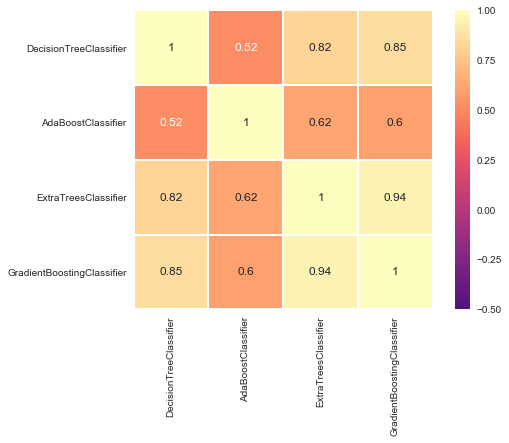

In [83]:
stack_models([dt,ada,et,gbc], plot=True)

## Plotting the best Model

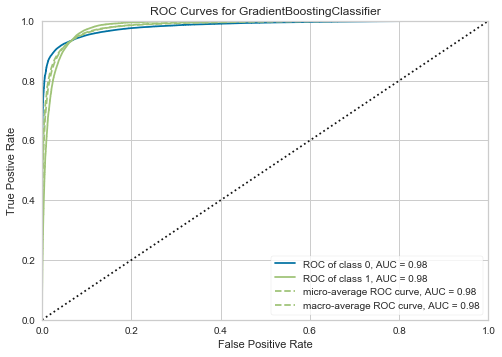

In [88]:
plot_model(gbc)

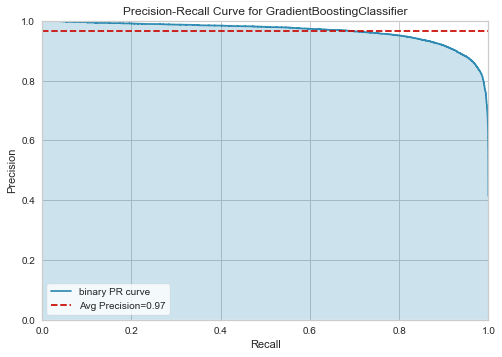

In [89]:
plot_model(gbc, 'pr')

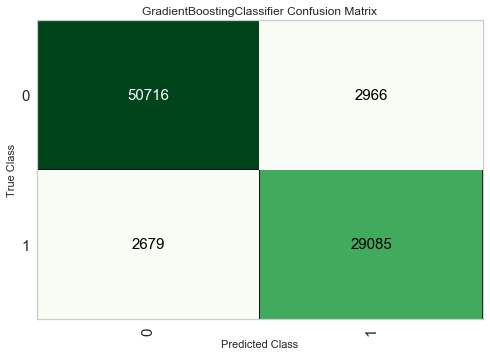

In [90]:
plot_model(gbc, 'confusion_matrix')

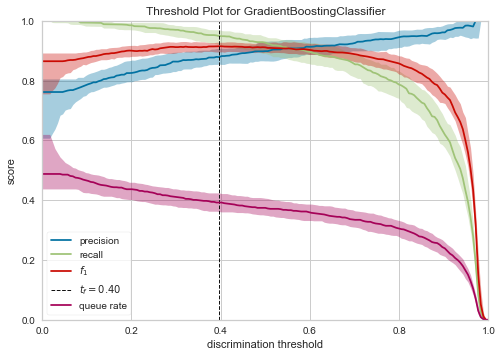

In [91]:
plot_model(gbc, 'threshold')

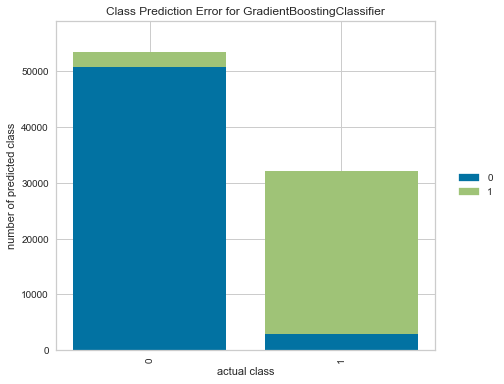

In [92]:
plot_model(gbc, 'error')

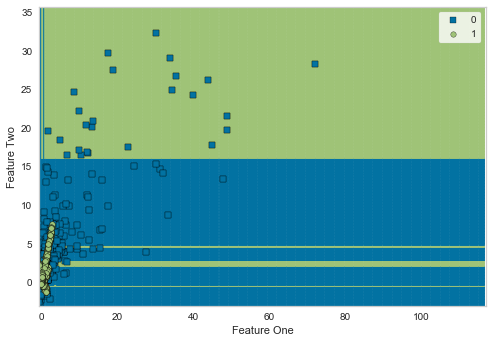

In [93]:
plot_model(gbc, 'boundary')

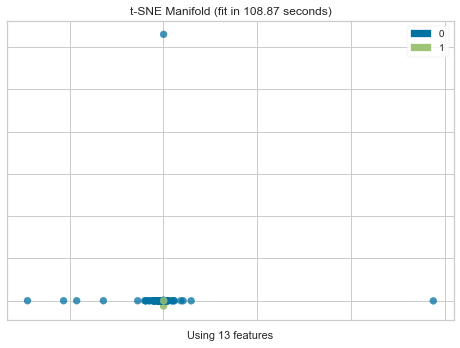

In [94]:
plot_model(gbc, 'manifold')

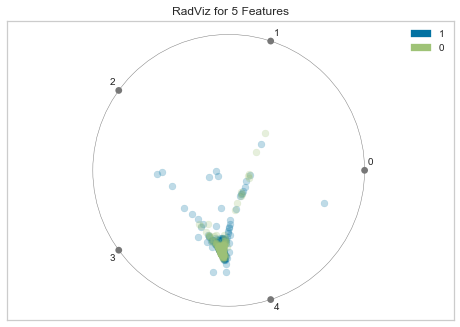

In [96]:
plot_model(gbc, 'dimension')

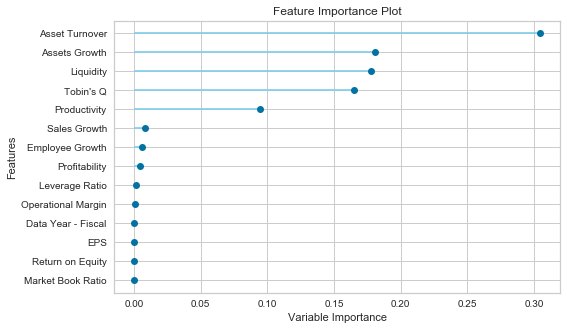

In [104]:
plot_model(lr, 'feature')